In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [297]:
def generate_points(x_range, y_range, point_class, point_count = 15): 
    points = np.empty((point_count, 3), dtype = float)
    for i in range(point_count):
        points[i] = [np.random.uniform(x_range[0], x_range[1]), np.random.uniform(y_range[0], y_range[1]), point_class]
        
    return points

In [298]:
X0_points = generate_points((3, 5), (3, 5), 0)
X1_points = generate_points((5, 6), (5, 6), 1)

points = np.vstack((X0_points, X1_points))

In [299]:
df = pd.DataFrame(points, columns = ['x', 'y', 'class'])

df.to_csv("points.csv", header = False, index = False)

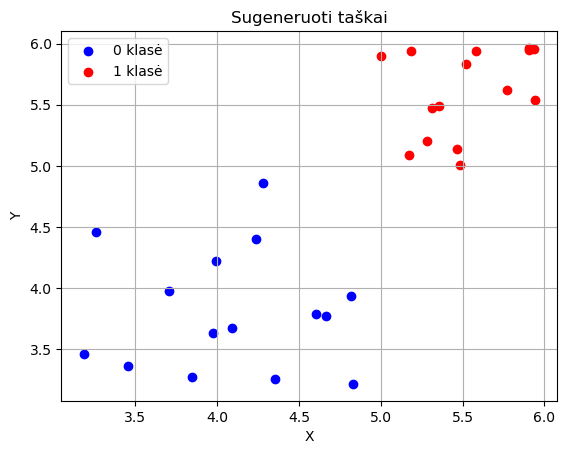

In [300]:
def plot_points(dataframe):
    plt.scatter(dataframe[dataframe['class'] == 0]['x'], dataframe[dataframe['class'] == 0]['y'], color = 'blue', label = '0 klasė')
    plt.scatter(dataframe[dataframe['class'] == 1]['x'], dataframe[dataframe['class'] == 1]['y'], color = 'red', label = '1 klasė')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Sugeneruoti taškai')
    plt.grid(True)
    plt.legend()
    plt.show()
    
plot_points(df)

In [301]:
points_array = df[['x', 'y']].to_numpy()
class_array = df['class'].to_numpy().astype(int)

def calculate_sum(points_array, w, b):
    return points_array @ w + b

def calculate_a_threshold(points_array):
    return (points_array >= 0).astype(int)

def calculate_a_sigmoid(points_array):
    return 1 / (1 + np.exp(-points_array))

def predict(points_array, w, b, activation_function):
    a = calculate_sum(points_array, w, b)
    if activation_function == "threshold":
        return calculate_a_threshold(a)
    elif activation_function == "sigmoid":
        sigmoid = calculate_a_sigmoid(a)
        return (sigmoid >= 0.5).astype(int)
    
    raise ValueError("Error on activation. Use 'threshold' or 'sigmoid'.")
        
def accuracy(y_predicted, class_array):
    return (y_predicted == class_array).mean()

# w = np.array([0.65444552, 2.65835259])
# #[(array([3.88524871, 1.62233218]), -30.02243483399424), previous w = 1.0, 1.0, previous b = -11.0
# #(array([0.65444552, 2.65835259]), -21.184438581753827),
# #(array([ 6.74764725, -0.11716707]), -38.41432756647316)]
# b = -21.184438581753827
# 
# y_threshold = predict(points_array, w, b, "threshold")
# print("Predictions with Threshold Activation:", accuracy(y_threshold, class_array))
# 
# y_sigmoid = predict(points_array, w, b, "sigmoid")
# print("Predictions with Sigmoid Activation:", accuracy(y_sigmoid, class_array))
# 
# 
# a_vals = calculate_sum(points_array, w, b)
# debug = pd.DataFrame({
#     "x": df["x"],
#     "y": df["y"],
#     "b": df
#     "class_array": class_array,
#     "a": a_vals,
#     "y_threshold": y_threshold
# })
# 
# print(debug.head(30))


In [302]:
def find_weight_bias(points_array, class_array, activation_function,  w_low = -10, w_max = 10, b_low = -50, b_high= 50, max_iterations = 500000, seed = 123):
    rng = np.random.default_rng(seed)
    solution = []
    seen = set()
    
    for _ in range(max_iterations):
        w = rng.uniform(w_low, w_max, size = 2)
        b = rng.uniform(b_low, b_high)
        
        y_predicted = predict(points_array, w, b, activation_function)
        if len(solution) == 3:
            break
        if np.array_equal(y_predicted, class_array):
            key = (tuple(np.round(w, 8)), float(np.round(b, 8)))
            if key not in seen:
                seen.add(key)
                solution.append((w.copy(), b))
                
        
    return  solution
    

In [303]:
print("Finding weights and bias for Threshold Activation...")
threshold_solutions = find_weight_bias(points_array, class_array, "threshold", seed = 321)
print("Threshold Activation Solutions:", threshold_solutions)

Finding weights and bias for Threshold Activation...
Threshold Activation Solutions: [(array([4.82423105, 2.40123061]), -34.580240782228685), (array([2.30811992, 4.21932796]), -31.024381729646542), (array([6.43183327, 1.71086207]), -41.826651900577204)]


In [304]:
print("Finding weights and bias for Sigmoid Activation...")
sigmoid_solutions = find_weight_bias(points_array, class_array, "sigmoid")
print("Sigmoid Activation Solutions:", sigmoid_solutions)


Finding weights and bias for Sigmoid Activation...
Sigmoid Activation Solutions: [(array([0.87192334, 8.72441788]), -46.272814968914844), (array([1.56865474, 7.16340712]), -43.70509108580744), (array([3.52092435, 6.42077868]), -48.58353379560302)]


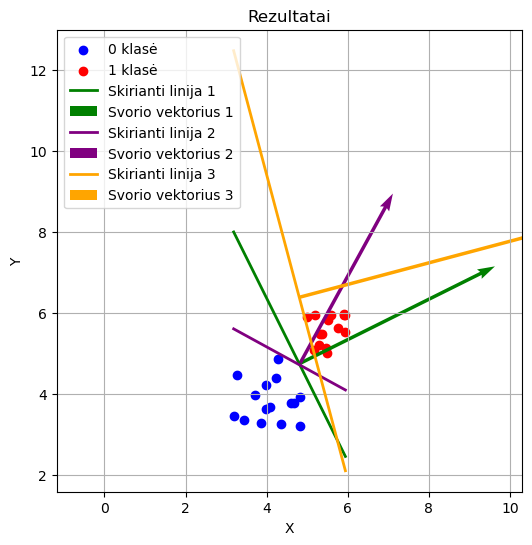

In [305]:
def plot_solutions(dataframe, solution_weights):
    plt.figure(figsize=(6, 6))
    plt.scatter(dataframe[dataframe['class'] == 0]['x'], dataframe[dataframe['class'] == 0]['y'], color = 'blue', label = '0 klasė')
    plt.scatter(dataframe[dataframe['class'] == 1]['x'], dataframe[dataframe['class'] == 1]['y'], color = 'red', label = '1 klasė')
    x_min = dataframe['x'].min()
    x_max = dataframe['x'].max()
    y_min = dataframe['y'].min()
    y_max = dataframe['y'].max()

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Rezultatai')
    plt.grid(True)
    
    x_vals = np.linspace(
        dataframe['x'].min(),
        dataframe['x'].max(),
        100
    )
    
    colors = ['green', 'purple', 'orange']
    
    x_center = dataframe['x'].mean()
    y_center = dataframe['y'].mean()
    
    for i, (w, b) in enumerate(solution_weights):
        w1, w2 = w
        color = colors[i]
        
        y_vals = (-w1 * x_vals - b) / w2
        plt.plot(
            x_vals,
            y_vals,
            color=color,
            linewidth=2,
            label=f'Skirianti linija {i+1}'
        )
        
        x0 = x_center
        y0 = (-w1 * x0 - b) / w2
    

        plt.quiver(
            x0, y0,       
            w1, w2,    
            angles='xy',
            scale_units='xy',
            scale=1,    
            color=color,
            label=f'Svorio vektorius {i+1}'
        )
    
    plt.legend(loc='upper left')
    plt.axis('equal') 
    plt.show()
    
plot_solutions(df, threshold_solutions)